[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a: Sex
b: Number of siblings
c: Numbers from rolling a dice
d: Height

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

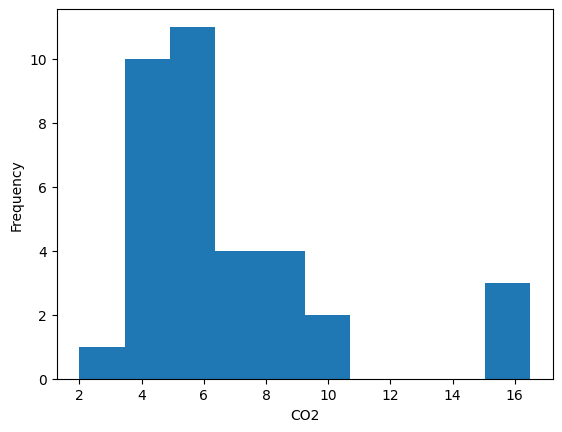

In [20]:
plt.hist(carbon_west['CO2'])
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [21]:
mean = np.mean(carbon_west['CO2'])
median = np.median(carbon_west['CO2'])
std = np.std(carbon_west['CO2'])

In [22]:
print(mean)
print(median)
print(std)

6.717142857142858
5.9
3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [23]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

In [24]:
murders

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6
5,CO,3.9
6,CT,2.8
7,DE,5.6
8,FL,5.0
9,GA,6.7


Part a. Find the mean and standard deviation for murders without D.C.

In [25]:
mean = np.mean(murders['murder'][0:50])
std = np.std(murders['murder'][0:50])
print(mean)
print(std)

4.874
2.560297638947472


Part b. Find the five-number  summary without D.C.

In [26]:
min = np.min(murders['murder'][0:50])
Q1 = np.percentile(murders['murder'][0:50], 25)
median = np.median(murders['murder'][0:50])
Q3 = np.percentile(murders['murder'][0:50], 75)
max = np.max(murders['murder'][0:50])

In [27]:
print(min)
print(Q1)
print(median)
print(Q3)
print(max)

1.0
2.625
4.85
6.175
12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [28]:
full_mean = np.mean(murders['murder'])
full_min = np.min(murders['murder'])
full_Q1 = np.percentile(murders['murder'], 25)
full_median = np.median(murders['murder'])
full_Q3 = np.percentile(murders['murder'], 75)
full_max = np.max(murders['murder'])

In [29]:
print(full_mean)
print(full_min)
print(full_Q1)
print(full_median)
print(full_Q3)
print(full_max)

5.252941176470588
1.0
2.6500000000000004
5.0
6.45
24.2


In [30]:
range = max - min
print(range)
IQR = Q3 - Q1
print(IQR)
full_Range = full_max - full_min
print(range)
full_IQR = full_Q3 - full_Q1
print(full_IQR)

11.4
3.55
11.4
3.8


The mean changes more than the median does with the outlier DC included. The range is greatly affected by DC's inclusion.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [31]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

In [32]:
houses

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
...,...,...,...,...,...,...,...
95,96,264.00,1060,0,990,2,2
96,97,294.75,1730,0,3030,3,2
97,98,198.30,1370,0,1580,3,2
98,99,132.60,1560,0,1770,3,2


Part a. Construct a scatterplot between square feet and price of a home.

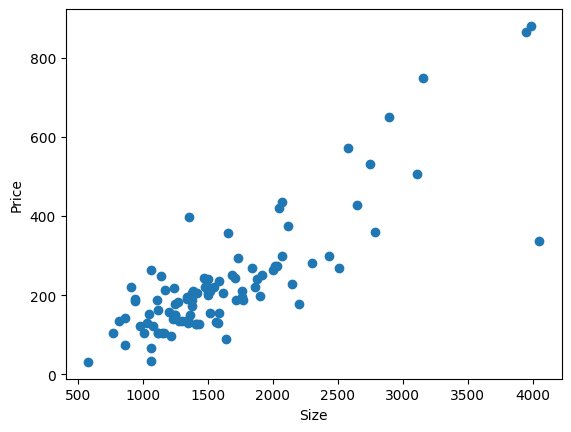

In [33]:
plt.scatter(houses['size'], houses['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

Part b. Find the correlation between the two variables.

In [34]:
corr = houses['size'].corr(houses['price'])
print(corr)

0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

In [35]:
from sklearn.linear_model import LinearRegression
x = houses[['size']]
y = houses['price']
model = LinearRegression()
model.fit(x, y)

LinearRegression()

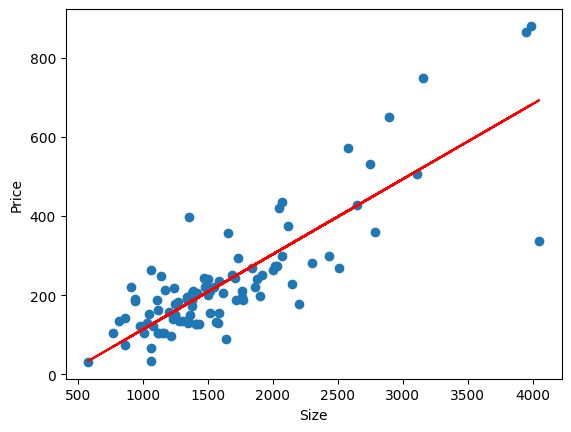

In [36]:
plt.scatter(houses['size'], houses['price'])
plt.plot(x, model.predict(x), color='red')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

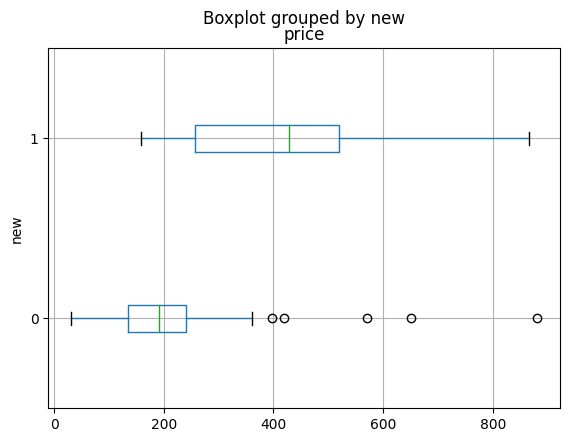

In [37]:
houses.boxplot(column='price', by='new', vert=False)
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

The relationship between size and price is a strong positive relationship. The value for the regression line is .83 which is really good and the graph supports that as the scatterplot strongly follows the regression line.

The Price for new houses is in general higher than old houses. The median for old houses is about 200K, whereas new houses is about 450k. So generally, new houses are worth more than older houses.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [38]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep="\\s+")

In [39]:
happy

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male
...,...,...,...,...
2137,2138,3,3,female
2138,2139,3,3,female
2139,2140,3,3,female
2140,2141,3,3,female


In [40]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
